In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import collections
from collections import defaultdict

In [2]:
matches=pd.read_csv("matches.csv")
matches.tail(20)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
736,11332,2019,Chennai,23/04/19,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,SR Watson,M. A. Chidambaram Stadium,Nigel Llong,Anil Chaudhary,Vineet Kulkarni
737,11333,2019,Bengaluru,24/04/19,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,17,0,AB de Villiers,M. Chinnaswamy Stadium,Bruce Oxenford,C Shamshuddin,Rod Tucker
738,11334,2019,Kolkata,25/04/19,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,VR Aaron,Eden Gardens,Ian Gould,Anil Dandekar,Nitin Menon
739,11335,2019,Chennai,26/04/19,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,46,0,RG Sharma,M. A. Chidambaram Stadium,Nigel Llong,Anil Chaudhary,Vineet Kulkarni
740,11336,2019,Jaipur,27/04/19,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,7,JD Unadkat,Sawai Mansingh Stadium,Yeshwant Barde,Nand Kishore,Sundaram Ravi
741,11337,2019,Delhi,28/04/19,Delhi Capitals,Royal Challengers Bangalore,Delhi Capitals,bat,normal,0,Delhi Capitals,16,0,S Dhawan,Feroz Shah Kotla Ground,Bruce Oxenford,KN Ananthapadmanabhan,C Shamshuddin
742,11338,2019,Kolkata,28/04/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Kolkata Knight Riders,34,0,AD Russell,Eden Gardens,Ian Gould,Nitin Menon,Anil Dandekar
743,11339,2019,Hyderabad,29/04/19,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,45,0,DA Warner,Rajiv Gandhi Intl. Cricket Stadium,S Ravi,O Nandan,Nanda Kishore
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary
745,11341,2019,Chennai,01/05/19,Chennai Super Kings,Delhi Capitals,Delhi Capitals,field,normal,0,Chennai Super Kings,80,0,MS Dhoni,M. A. Chidambaram Stadium,Anil Dandekar,Nitin Menon,Ian Gould


In [3]:
#Data Cleaning
#Replacing duplicate team name
matches=matches.replace(to_replace ="Rising Pune Supergiant", value ="Rising Pune Supergiants") 
matches=matches.replace(to_replace ="Delhi Daredevils", value ="Delhi Capitals") 
matches=matches.replace(to_replace ="Deccan Chargers", value ="Sunrisers Hyderabad") 

#Filling Null values in winner column
matches['winner'] = matches['winner'].fillna("No Result")

#Merging similar name of stadiums into one
matches=matches.replace(to_replace ="MA Chidambaram Stadium, Chepauk", value ="M. A. Chidambaram Stadium") 
matches=matches.replace(to_replace ="Punjab Cricket Association IS Bindra Stadium, Mohali", value ="Punjab Cricket Association Stadium, Mohali") 
matches=matches.replace(to_replace ="M. Chinnaswamy Stadium", value ="M Chinnaswamy Stadium") 
matches=matches.replace(to_replace ="ACA-VDCA Stadium", value ="Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium") 
matches=matches.replace(to_replace ="Rajiv Gandhi International Stadium, Uppal", value ="Rajiv Gandhi Intl. Cricket Stadium") 


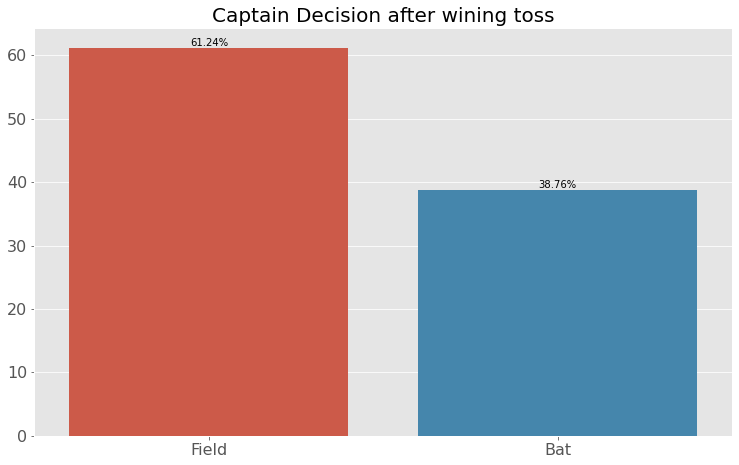

In [11]:
toss_won_and_field=len(matches['toss_winner'][matches['toss_decision']=='field'])
toss_won_and_bat=len(matches['toss_winner'][matches['toss_decision']=='bat'])
labels=["Field","Bat"]
total=toss_won_and_bat+toss_won_and_field
result=[(toss_won_and_field/total)*100,(toss_won_and_bat/total)*100]
fig=plt.gcf()
plt.style.use('ggplot')
fig.set_size_inches(12.5,7.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Captain Decision after wining toss",fontsize=20)
ax=sns.barplot(labels,result)
count=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 0.3,str(round(result[count],2))+"%",ha="center") 
    count+=1

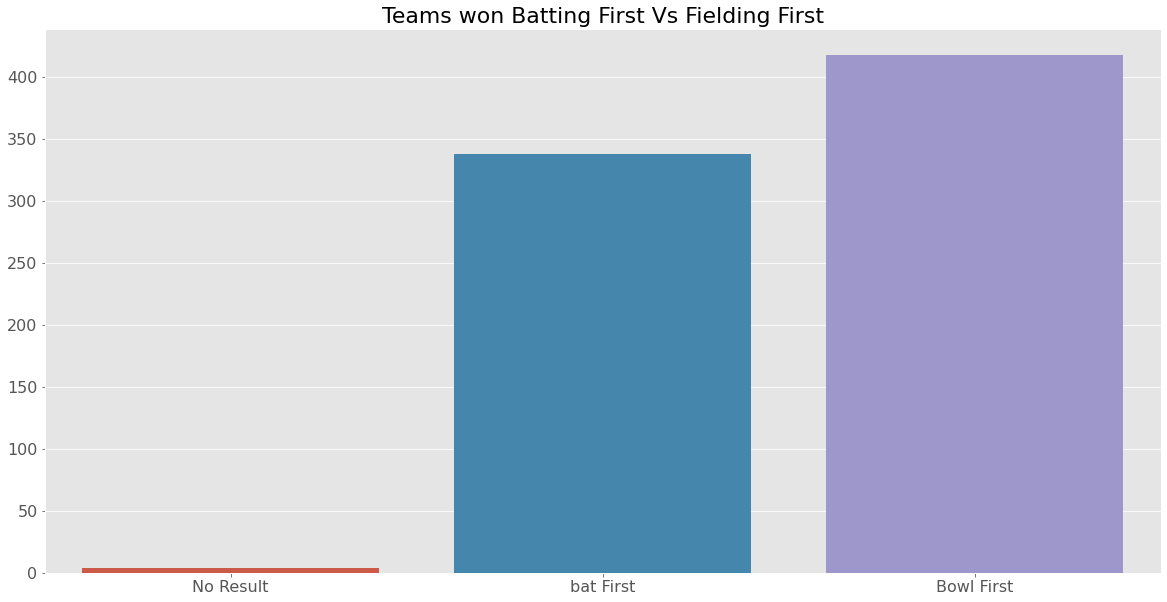

In [12]:
#Analysis of teams won batting first Vs Fielding first
team=list(matches.team1.unique())
bat_first=0
bowl_first=0
draw=0
for i in range(len(matches)):
    if matches['team1'].iloc[i] in team or matches['team2'].iloc[i] in team:
        t1=matches['team1'].iloc[i]
        t2=matches['team2'].iloc[i]
        if matches.toss_winner.iloc[i]==t1 and matches.toss_decision.iloc[i]=='field':
            if matches.winner.iloc[i]=="No Result":
                draw+=1
            if matches.winner.iloc[i]==t1:
                bowl_first+=1
            else:
                bat_first+=1
        elif matches.toss_winner.iloc[i]==t1 and matches.toss_decision.iloc[i]=='bat':
            if matches.winner.iloc[i]=="No Result":
                draw+=1
            if matches.winner.iloc[i]==t1:
                bat_first+=1
            else:
                bowl_first+=1
        elif matches.toss_winner.iloc[i]==t2 and matches.toss_decision.iloc[i]=='field':
            if matches.winner.iloc[i]=="No Result":
                draw+=1
            if matches.winner.iloc[i]==t2:
                bowl_first+=1
            else:
                bat_first+=1  
        elif matches.toss_winner.iloc[i]==t2 and matches.toss_decision.iloc[i]=='bat':
            if matches.winner.iloc[i]=="No Result":
                draw+=1
            if matches.winner.iloc[i]==t2:
                bat_first+=1
            else:
                bowl_first+=1  
labels=["No Result",'bat First',"Bowl First"]
result=[draw,bat_first,bowl_first]
fig=plt.gcf()
plt.style.use('ggplot')
fig.set_size_inches(20,10)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Teams won Batting First Vs Fielding First",fontsize=22)
sns.barplot(labels,result)

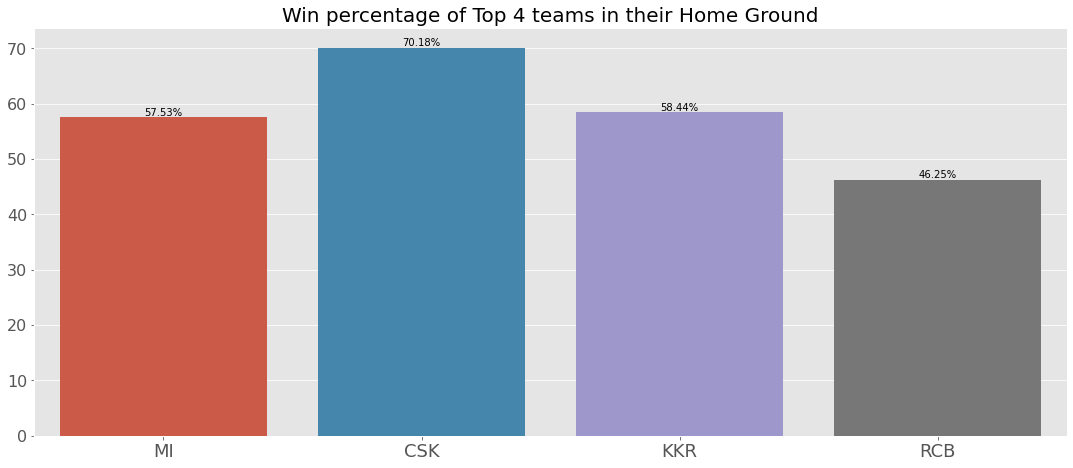

In [13]:
mi_ground=["Wankhede Stadium"]
csk_ground=["M. A. Chidambaram Stadium","MA Chidambaram Stadium, Chepauk"]
kkr_ground=["Eden Gardens"]
rcb_ground=["M Chinnaswamy Stadium","M. Chinnaswamy Stadium"]

#calcualting win percentage in their home grounds
mi,csk,rcb,kkr=0,0,0,0
mi_total,csk_total,kkr_total,rcb_total=0,0,0,0
for i in range(len(matches)):
    if matches.season.iloc[i]>=2007:
        if matches.venue.iloc[i] in mi_ground:
            mi_total+=1
            if matches.winner.iloc[i]=='Mumbai Indians':
                mi+=1
        elif matches.venue.iloc[i] in csk_ground:
            csk_total+=1
            if matches.winner.iloc[i]=='Chennai Super Kings':
                csk+=1
        elif matches.venue.iloc[i] in rcb_ground:
            rcb_total+=1
            if matches.winner.iloc[i]=='Royal Challengers Bangalore':
                rcb+=1
        elif matches.venue.iloc[i] in kkr_ground: 
            kkr_total+=1
            if matches.winner.iloc[i]=='Kolkata Knight Riders':
                kkr+=1
#print(mi,csk,kkr,rcb)
#print(mi_total,csk_total,kkr_total,rcb_total)
team=["MI","CSK","KKR","RCB"]
result=[mi/mi_total,csk/csk_total,kkr/kkr_total,rcb/rcb_total]
for i in range(0,len(result)):
    result[i]*=100

fig=plt.gcf()
plt.style.use('ggplot')
fig.set_size_inches(18.5,7.5)
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title("Win percentage of Top 4 teams in their Home Ground",fontsize=20)
ax=sns.barplot(team,result)
count=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 0.3,str(round(result[count],2))+"%",ha="center") 
    count+=1

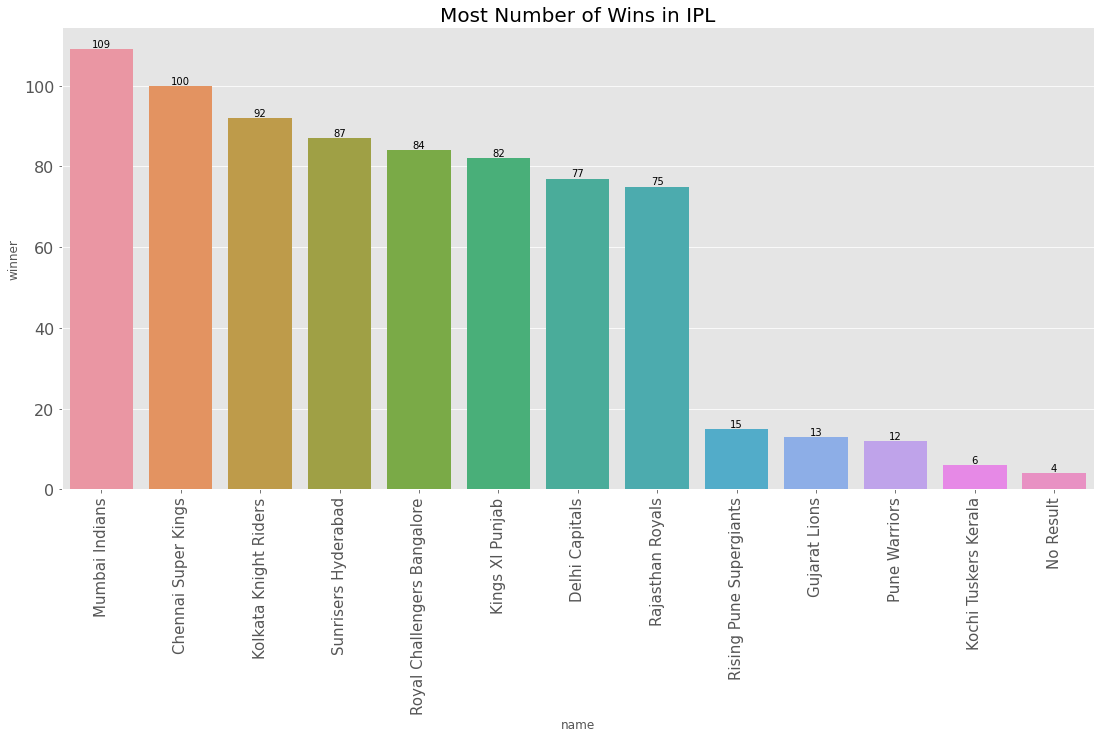

In [14]:
#Team with most wins
wins=pd.DataFrame(matches['winner'].value_counts(),index=None)
plt.style.use('ggplot')
fig=plt.gcf()
fig.set_size_inches(18.5,8.5)
#wins=pd.DataFrame(matches['winner'].value_counts())
wins['name']=wins.index
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=16)
plt.title("Most Number of Wins in IPL",fontsize=20)
ax=sns.barplot(wins['name'],wins['winner'])
count=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 0.5,wins['winner'].iloc[count],ha="center") 
    count+=1

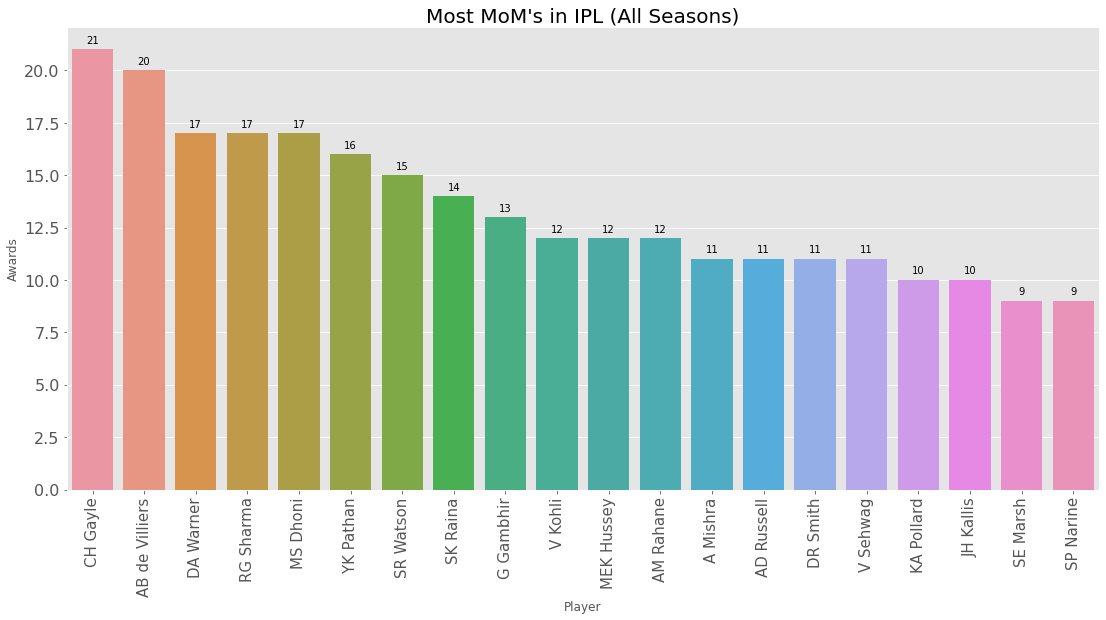

In [15]:
#With most mom awards in IPL
mom = pd.DataFrame()
mom['Awards']=matches['player_of_match'].value_counts()
mom['Player'] =mom.index
mom=mom[:20]
plt.style.use('ggplot')
fig=plt.gcf()
fig.set_size_inches(18.5,8.5)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=16)
plt.title("Most MoM's in IPL (All Seasons)",fontsize=20)
ax=sns.barplot(mom['Player'],mom['Awards'])
count=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 0.3,mom['Awards'].iloc[count],ha="center") 
    count+=1

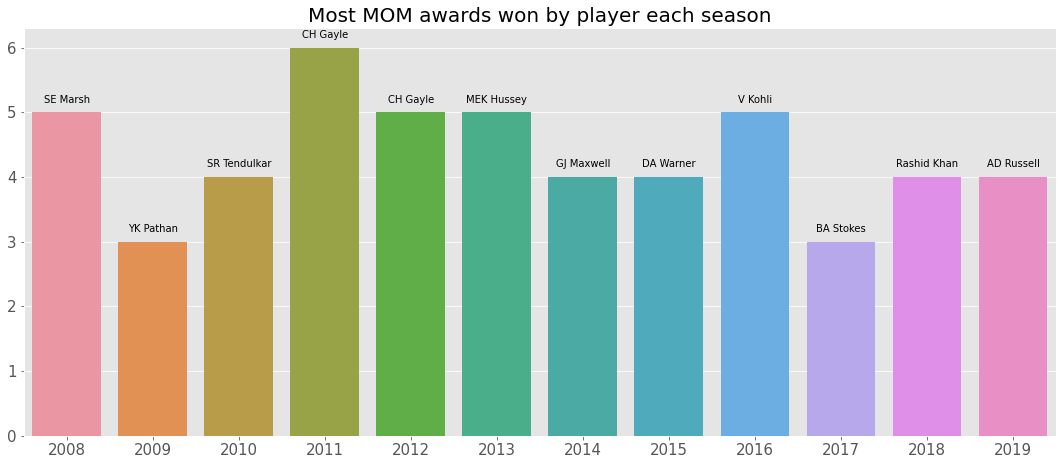

In [16]:

dic=defaultdict(list)
for i in range(0,len(matches)):
    #if matches.season.iloc[i] not in dic.keys():
    dic[matches.season.iloc[i]].append(matches.player_of_match.iloc[i])
player=[]
match=[]
year=[]
for i in sorted(dic.keys()):
    ctr=collections.Counter(dic[i])
    d={k: v for k, v in sorted(ctr.items(), key=lambda item: item[1],reverse=True)}
    player.append(list(d.keys())[0])
    match.append(list(d.values())[0])
    year.append(i)
plt.style.use('ggplot')
fig=plt.gcf()
fig.set_size_inches(18.5,7.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Most MOM awards won by player each season",fontsize=20)
ax=sns.barplot(year,match)
count=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 0.15,player[count],ha="center") 
    count+=1

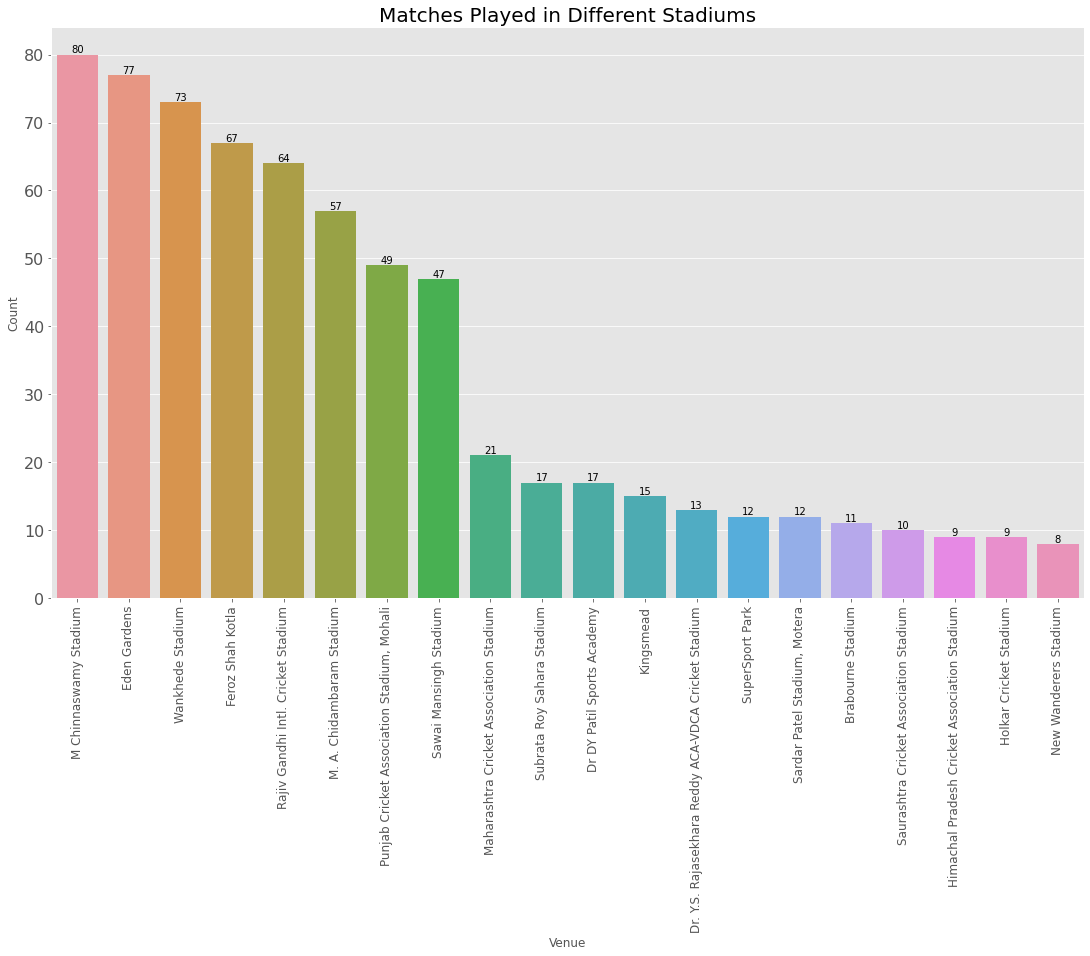

In [17]:
mom = pd.DataFrame()
mom['Count']=matches['venue'].value_counts()
mom['Venue'] =mom.index
mom=mom[:20]
plt.style.use('ggplot')
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=16)
plt.title("Matches Played in Different Stadiums",fontsize=20)
ax=sns.barplot(mom['Venue'],mom['Count'])
count=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 0.3,mom['Count'].iloc[count],ha="center") 
    count+=1